## SPRINT 8 - Visualizaciones en Python

Mailin Adriana Villan Villan <br>

Esta práctica permitirá explorar cómo se pueden utilizar herramientas de visualización avanzadas en Python para interpretar y presentar datos de forma efectiva, proporcionando una oportunidad valiosa para mejorar las habilidades analíticas y técnicas.

***


## Nivel 1

Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

***


In [18]:
import sys
!{sys.executable} -m pip install --upgrade pip

import sys
!{sys.executable} -m pip install mysql-connector-python pandas seaborn matplotlib numpy ipywidgets

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 660.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/1.8 MB 2.6 MB/s eta 0:00:01
   ------------ --------------------------- 0.6/1.8 MB 4.1 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/1.8 MB 5.1 MB/s eta 0:00:01
   ------------------------------- -------- 1.4/1.8 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   -------------------------- ------------- 1.6/2.3 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 8.3 MB/s eta 0:00:00


In [19]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from mysql.connector import Error

try:
    conexion_bd = mysql.connector.connect(host='localhost',
                                         database='transactions',
                                         user='root',
                                         password='root')
    pd.set_option("display.max.columns", None) 
    
    if conexion_bd.is_connected():
        db_Info = conexion_bd.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = conexion_bd.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        
        cursor = conexion_bd.cursor()
        cursor.execute("SHOW TABLES")
        MySQL_tables = [table[0] for table in cursor.fetchall()]  

except Error as e:
    print("Error while connecting to MySQL", e)

        
print("Tablas disponibles en la base de datos:", MySQL_tables)

query = "SELECT * FROM companies;"
df = pd.read_sql(query, conexion_bd)
print(df.head())

query = "SELECT amount FROM transactions;"
df = pd.read_sql(query, conexion_bd)
print(df.head())

Connected to MySQL Server version  8.4.0
You're connected to database:  ('transactions',)
Tablas disponibles en la base de datos: ['companies', 'credit_cards', 'estat_targetes', 'products', 'transactions', 'transactions_products', 'transation_num_product', 'users']
  company_id                 company_name           phone  \
0     b-2222    Ac Fermentum Incorporated  06 85 56 52 33   
1     b-2226     Magna A Neque Industries  04 14 44 64 62   
2     b-2230                  Fusce Corp.  08 14 97 58 85   
3     b-2234    Convallis In Incorporated  06 66 57 29 50   
4     b-2238  Ante Iaculis Nec Foundation  08 23 04 99 53   

                              email        country  \
0  donec.porttitor.tellus@yahoo.net        Germany   
1       risus.donec.nibh@icloud.org      Australia   
2              risus@protonmail.edu  United States   
3                mauris.ut@aol.couk        Germany   
4       sed.dictum.proin@outlook.ca    New Zealand   

                            website  
0   

C:\Users\formacio\AppData\Local\Temp\ipykernel_7396\1884899156.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)
C:\Users\formacio\AppData\Local\Temp\ipykernel_7396\1884899156.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


** Ejercicio 1 <br>

** Una variable numérica.<br>

** Explicación del código:<br>
** Lo que me llama la atención de graficar esta variable es: <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 


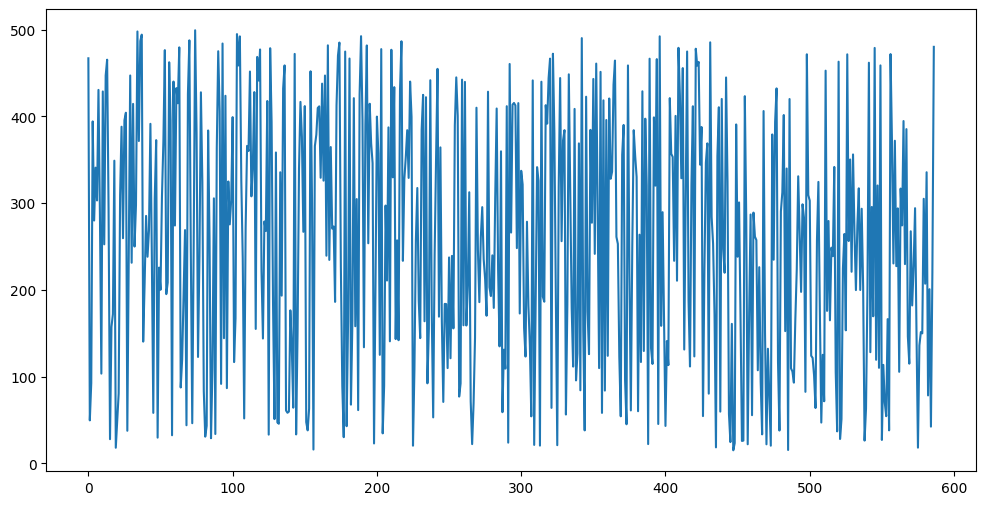

In [ ]:
plt.figure(figsize=(12,6))
df["amount"].plot()

plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.show()




In [ ]:

#cambiar formato de fecha 
df['timestamp'] = pd.to_datetime(df['timestamp'])

#extraer año y mes
df['year_month'] = df['timestamp'].dt.to_period('M')

#agrupa datos por año y mes 
df['year_month'] = df['timestamp'].dt.to_period('M')

#codigo para hacer el grafico 

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year_month'] = df['timestamp'].dt.to_period('M')
df_monthly = df.groupby('year_month')['amount'].sum().reset_index()

df_monthly['year_month'] = df_monthly['year_month'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(data=df_monthly, x='year_month', y='amount', color='royalblue')

plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Total Ventas")
plt.title("Ventas por Mes")
plt.show()

** Ejercicio 2 <br>

** Dos variables numéricas.<br>



** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 


In [42]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year_month'] = df['timestamp'].dt.to_period('M')
df_monthly = df.groupby('year_month')['amount'].sum().reset_index()

df_monthly['year_month'] = df_monthly['year_month'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(data=df_monthly, x='year_month', y='amount', color='royalblue')

plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Importe")
plt.title("Ventas por Mes")
plt.show()

KeyError: 'timestamp'

** Ejercicio 3 <br>

** Una variable categórica.<br>





** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 

Cantidad total de palabras en el texto: 4
{'la': 2, 'niña': 2}


** Ejercicio 4 <br>

** Una variable categórica y una numérica.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 

Diccionario inicial: {'lunes': 'sonreir', 'martes': 'cantar', 'miercoles': 'bailar', 'jueves': 'rezar', 'viernes': 'agradecer', 'sabado': 'nadar', 'domingo': 'pasear'}
Diccionario invertido: {'sonreir': 'lunes', 'cantar': 'martes', 'bailar': 'miercoles', 'rezar': 'jueves', 'agradecer': 'viernes', 'nadar': 'sabado', 'pasear': 'domingo'}


** Ejercicio 5 <br>

** Dos variables categóricas.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

** Ejercicio 6 <br>

** Tres variables.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

** Ejercicio 7 <br>

** Graficar un Pairplot.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

## Nivel 2
***
** Ejercicio 1 <br>

** Correlación de todas las variables numéricas.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 


** Ejercicio 2 <br>

** Implementa un jointplot.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos <br>

## Nivel 3
***
** Ejercicio 1 <br>

** Implementa un violinplot combinado con otro tipo de gráfico.



** Explicación del código: <br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos <br>

** Ejercicio 2 <br>

** Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos <br>

In [ ]:
# cierro la BD
if conexion_bd.is_connected():
        cursor.close()
        conexion_bd.close()
        print("MySQL connection is closed")

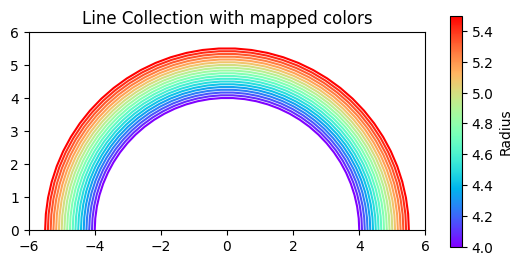

In [41]:
from matplotlib.collections import LineCollection

num_arcs = 19
theta = np.linspace(0, np.pi, 36)
radii = np.linspace(4, 5.5, num=num_arcs)
arcs = [np.column_stack([r * np.cos(theta), r * np.sin(theta)]) for r in radii]

fig, ax = plt.subplots(figsize=(6.4, 3))
# set axes limits manually because Collections do not take part in autoscaling
ax.set_xlim(-6, 6)
ax.set_ylim(0, 6)
ax.set_aspect("equal")  # to make the arcs look circular

# create a LineCollection with the half-circles and color mapping
line_collection = LineCollection(arcs, array=radii, cmap="rainbow")
ax.add_collection(line_collection)

fig.colorbar(line_collection, label="Radius")
ax.set_title("Line Collection with mapped colors")

plt.show()